In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
df.shape

(145460, 23)

In [27]:
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [29]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [30]:
df.isna().sum().sort_values(ascending=False)

,0
Sunshine,69835
Evaporation,62790
Cloud3pm,59358
Cloud9am,55888
Pressure9am,15065
Pressure3pm,15028
WindDir9am,10566
WindGustDir,10326
WindGustSpeed,10263
Humidity3pm,4507


In [31]:
def convert_date_to_num():
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df.drop('Date', axis=1, inplace=True)
    return df

df = convert_date_to_num()

In [32]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [33]:
df.shape

(145460, 25)

In [34]:
# # fill all missing values in numerical data with median
# for col in df.columns:
#     if df[col].dtype != 'object':
#         df[col].fillna(df[col].median(), inplace=True)

In [35]:
# df.isna().sum().sort_values(ascending=False)

In [36]:
# # fill all null values in categorical data with most frequent
# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col].fillna(df[col].mode()[0], inplace=True)

df.dropna(inplace=True)

In [37]:
df.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [38]:
df.shape

(56420, 25)

In [39]:
# fig, axes = plt.subplots(5, 5, figsize=(12, 6))
# axes = axes.flatten()
# for i, col in enumerate(df.columns):
#     sns.boxplot(data=df[col], ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].tick_params(labelsize=8)

# plt.tight_layout()
# plt.show()

In [40]:
def remove_outlier_iqr(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])

    return df

df = remove_outlier_iqr(df)

In [41]:
columns_name = [col for col in df.columns if df[col].dtype == 'object' and col != 'RainTomorrow']

for col in columns_name:
  x = pd.get_dummies(df[col], drop_first=True, dtype=int, prefix=col)
  df = pd.concat([df, x], axis=1)

df.drop(columns_name, axis=1, inplace=True)

In [42]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,1,0,0,0,0
6050,18.4,28.9,0.0,5.0,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,1,0,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [44]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,1,0,0,0,0
6050,18.4,28.9,0.0,5.0,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,1,0,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,43993
1,12427


In [46]:
df_majority = df[df['RainTomorrow'] == 0]
df_minority = df[df['RainTomorrow'] == 1]

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

df = pd.concat([df_majority_downsampled, df_minority])

df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,12427
1,12427


In [47]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(max_depth=1000, n_estimators=500)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8072822369744518
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      2486
           1       0.80      0.81      0.81      2485

    accuracy                           0.81      4971
   macro avg       0.81      0.81      0.81      4971
weighted avg       0.81      0.81      0.81      4971



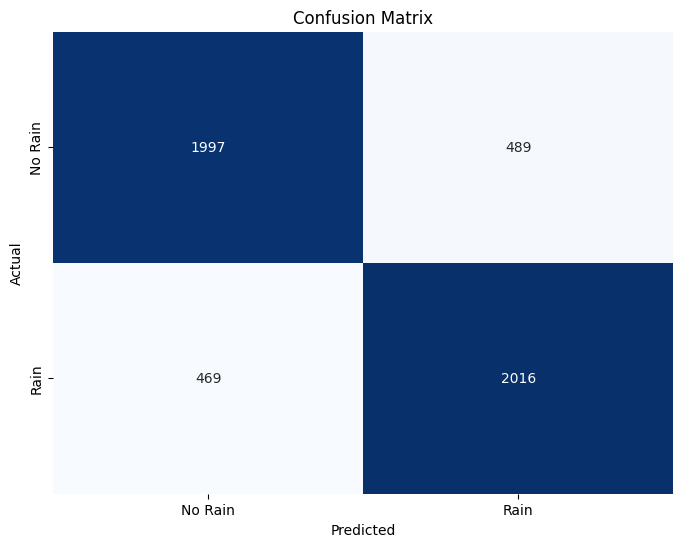

In [51]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
from re import M
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.795815731241199
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2486
           1       0.80      0.79      0.79      2485

    accuracy                           0.80      4971
   macro avg       0.80      0.80      0.80      4971
weighted avg       0.80      0.80      0.80      4971



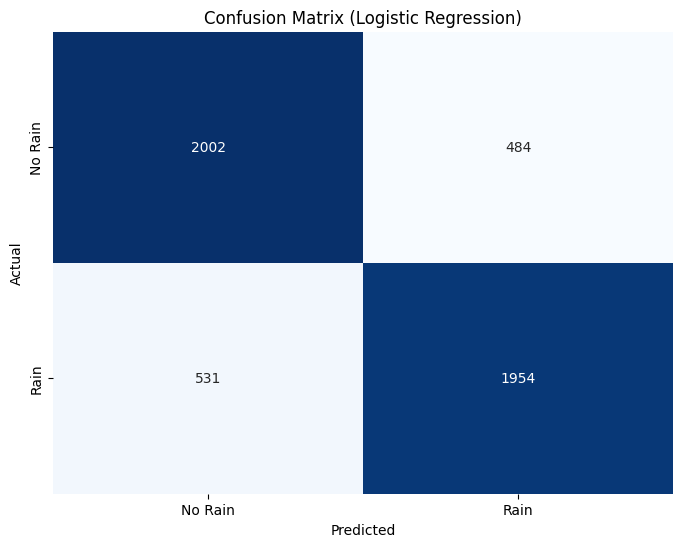

In [64]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.723798028565681
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      2486
           1       0.74      0.69      0.71      2485

    accuracy                           0.72      4971
   macro avg       0.73      0.72      0.72      4971
weighted avg       0.73      0.72      0.72      4971



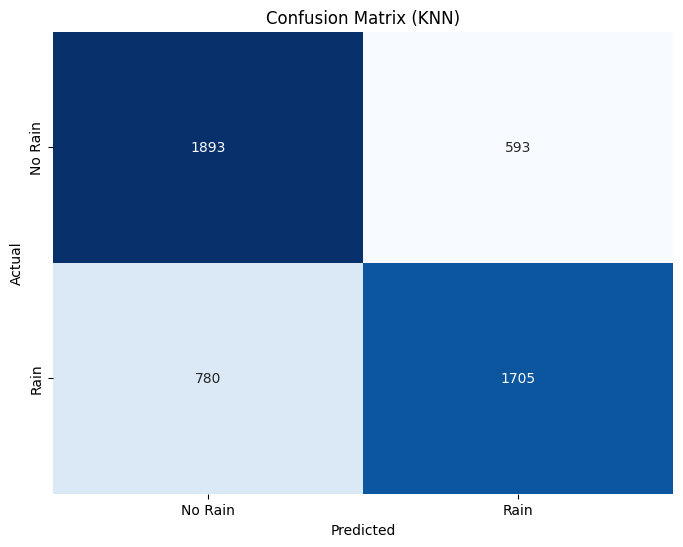

In [67]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7700663850331925
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      2486
           1       0.78      0.75      0.77      2485

    accuracy                           0.77      4971
   macro avg       0.77      0.77      0.77      4971
weighted avg       0.77      0.77      0.77      4971



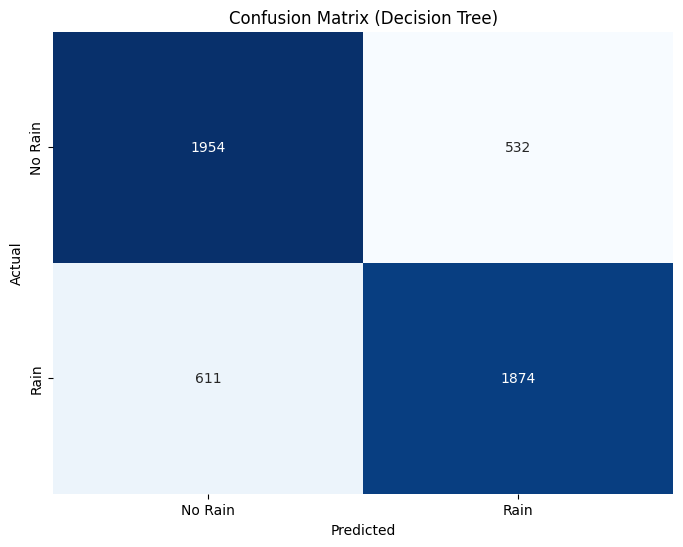

In [100]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

In [101]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)

Naive Bayes Accuracy: 0.71997585998793
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      2486
           1       0.71      0.75      0.73      2485

    accuracy                           0.72      4971
   macro avg       0.72      0.72      0.72      4971
weighted avg       0.72      0.72      0.72      4971



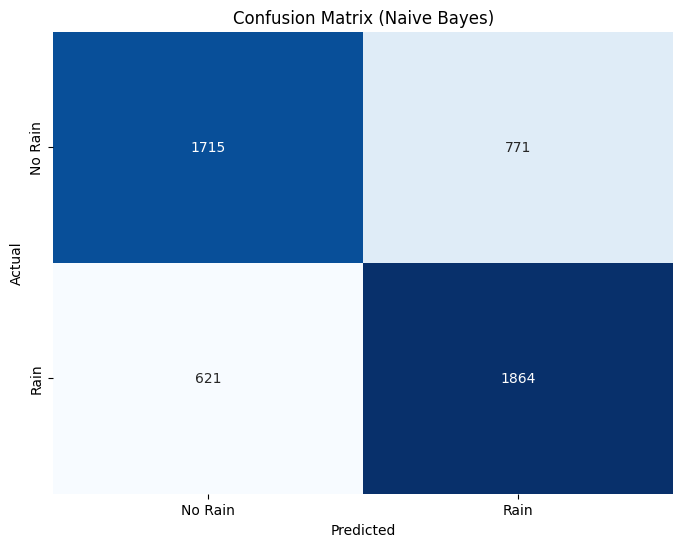

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

In [103]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)

SVM Accuracy: 0.8117079058539529
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      2486
           1       0.81      0.81      0.81      2485

    accuracy                           0.81      4971
   macro avg       0.81      0.81      0.81      4971
weighted avg       0.81      0.81      0.81      4971



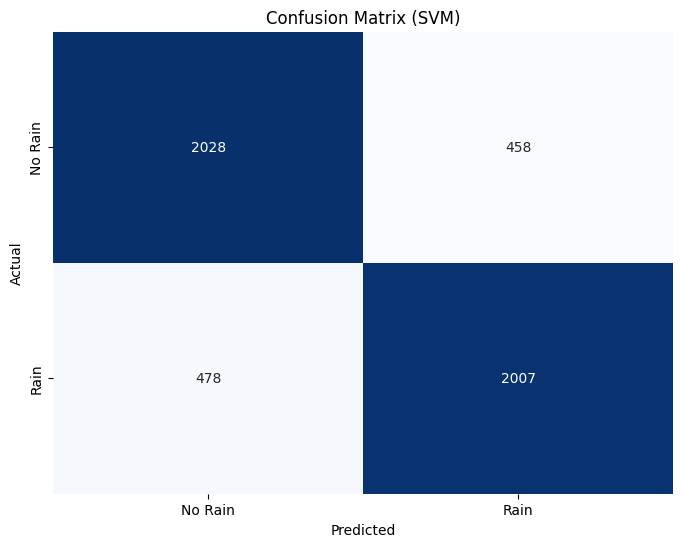

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()